In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels
import sklearn
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df= pd.read_csv('/content/Rose.csv', parse_dates=['YearMonth'], index_col='YearMonth')
df.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [ ]:
df.describe()

,Rose
count,185.000000
mean,90.394595
std,39.175344
min,28.000000
25%,63.000000
50%,86.000000
75%,112.000000
max,267.000000


In [ ]:
df.shape

(187, 1)

In [ ]:
print('The number of rows:', df.shape[0], '\n''The number of columns:', df.shape[1])

The number of rows: 187 
The number of columns: 1


In [ ]:
print("toal number of the year in the data:", 187/12)

toal number of the year in the data: 15.583333333333334


In [ ]:
df.isnull().sum()

Rose    2
dtype: int64

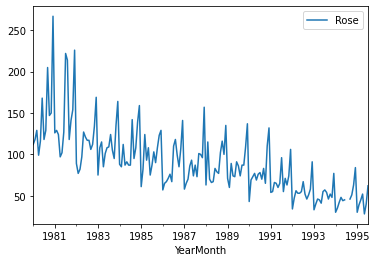

In [ ]:
df.plot()
plt.show()

In [ ]:
df_i= df.interpolate()
print(df_i)

             Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0
...           ...
1995-03-01   45.0
1995-04-01   52.0
1995-05-01   28.0
1995-06-01   40.0
1995-07-01   62.0

[187 rows x 1 columns]


In [ ]:
df_i.describe()

,Rose
count,187.000000
mean,89.914439
std,39.238325
min,28.000000
25%,62.500000
50%,85.000000
75%,111.000000
max,267.000000


In [ ]:
from pylab import rcParams
rcParams['figure.figsize']= 12, 8

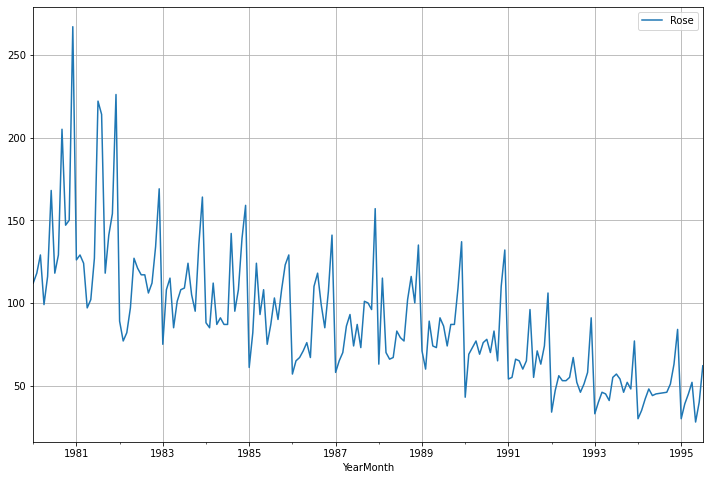

In [ ]:
df_i.plot(grid= True)
plt.show()

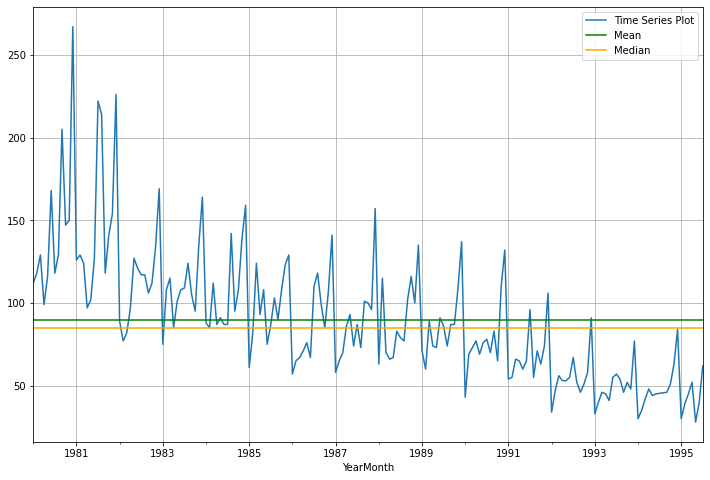

In [ ]:
df_i.plot();
plt.axhline(df_i['Rose'].mean(), color= 'Green');
plt.axhline(df_i['Rose'].median(), color='Orange')
plt.grid()
plt.legend(['Time Series Plot','Mean','Median']);

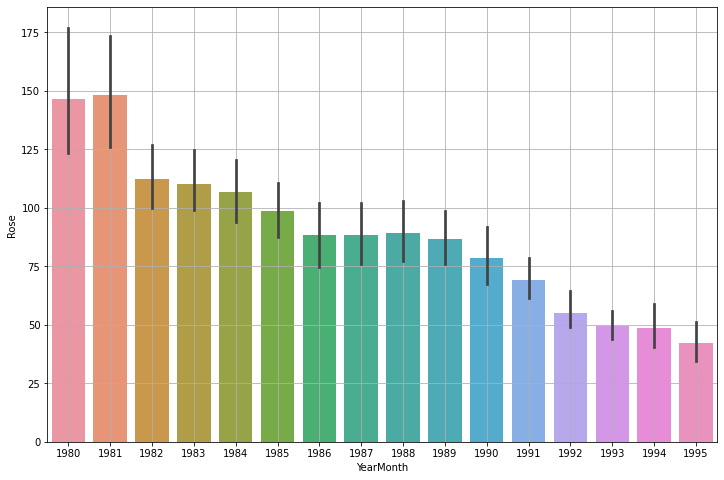

In [ ]:
sns.barplot(df_i.index.year,df.Rose,data=df_i)
plt.grid();

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

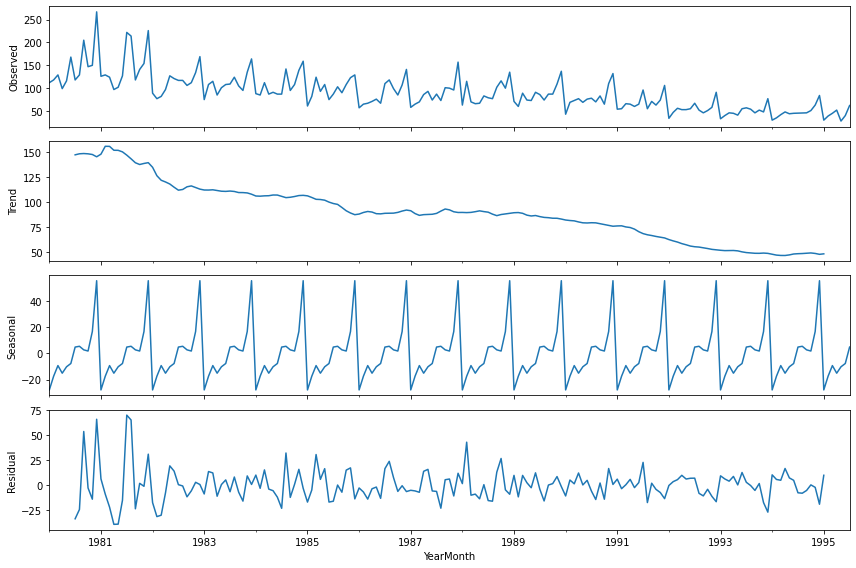

In [ ]:
Additive_decomposition= seasonal_decompose(df_i, model= 'additive')
Additive_decomposition.plot();

In [ ]:
trend= Additive_decomposition.trend
Seasonality= Additive_decomposition.seasonal
residual= Additive_decomposition.resid
print('trend','\n', trend.head(12), '\n'); print('Seasonality', '\n', Seasonality.head(12), '\n'); print('residual','\n', residual.head(12),'\n');



trend 
                   Rose
YearMonth             
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01  147.083333
1980-08-01  148.125000
1980-09-01  148.375000
1980-10-01  148.083333
1980-11-01  147.416667
1980-12-01  145.125000 

Seasonality 
                  Rose
YearMonth            
1980-01-01 -27.908647
1980-02-01 -17.435632
1980-03-01  -9.285830
1980-04-01 -15.098330
1980-05-01 -10.196544
1980-06-01  -7.678687
1980-07-01   4.896908
1980-08-01   5.499686
1980-09-01   2.774686
1980-10-01   1.871908
1980-11-01  16.846908
1980-12-01  55.713575 

residual 
                  Rose
YearMonth            
1980-01-01        NaN
1980-02-01        NaN
1980-03-01        NaN
1980-04-01        NaN
1980-05-01        NaN
1980-06-01        NaN
1980-07-01 -33.980241
1980-08-01 -24.624686
1980-09-01  53.850314
1980-10-01  -2.955241
1980-11-01 -14.263575
1980-12-01  66.161425 



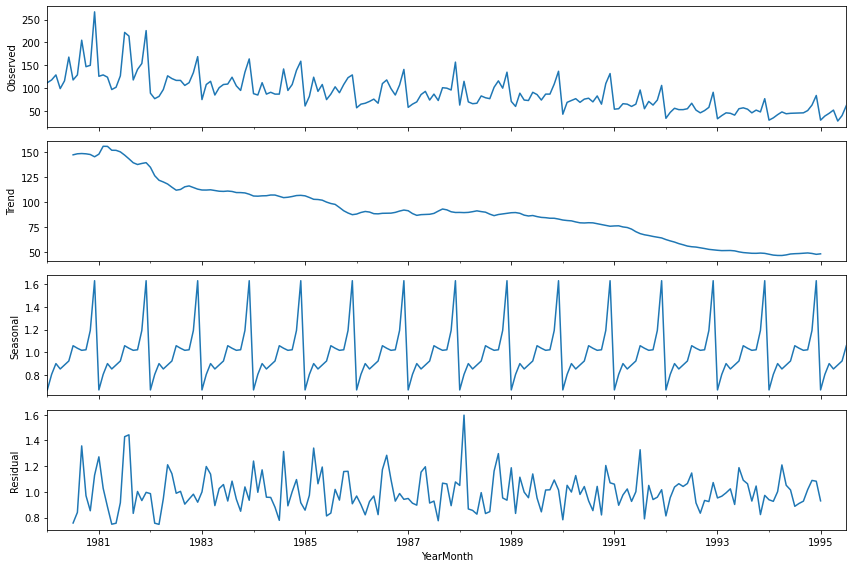

In [ ]:
multiplicative_decomposition= seasonal_decompose(df_i, model='multiplicative')
multiplicative_decomposition.plot();

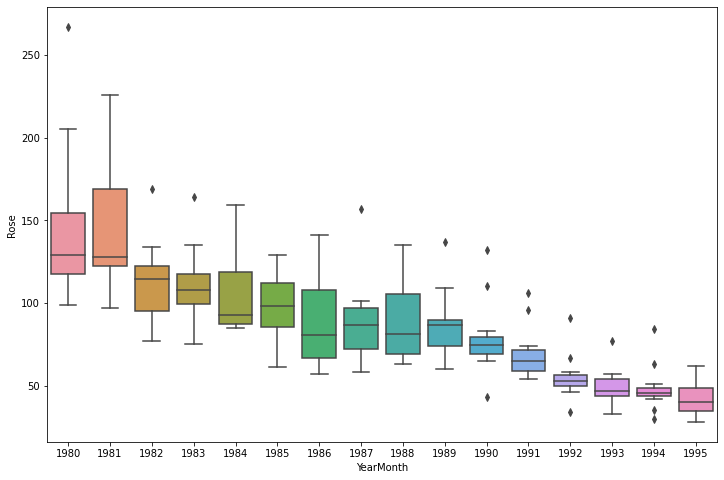

In [ ]:
sns.boxplot(x= df_i.index.year, y=df_i['Rose']);


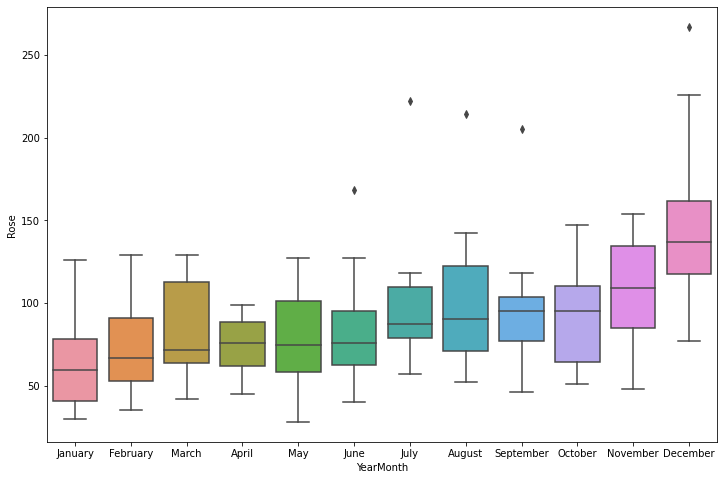

In [ ]:
sns.boxplot(x= df.index.month_name(), y= df['Rose'])

In [ ]:
years = pd.pivot_table(df, values = 'Rose', columns = df.index.month, index = df.index.year)
years

YearMonth,1,2,3,4,5,6,7,8,9,10,11,12
YearMonth,,,,,,,,,,,,
1980,112.0,118.0,129.0,99.0,116.0,168.0,118.0,129.0,205.0,147.0,150.0,267.0
1981,126.0,129.0,124.0,97.0,102.0,127.0,222.0,214.0,118.0,141.0,154.0,226.0
1982,89.0,77.0,82.0,97.0,127.0,121.0,117.0,117.0,106.0,112.0,134.0,169.0
1983,75.0,108.0,115.0,85.0,101.0,108.0,109.0,124.0,105.0,95.0,135.0,164.0
1984,88.0,85.0,112.0,87.0,91.0,87.0,87.0,142.0,95.0,108.0,139.0,159.0
1985,61.0,82.0,124.0,93.0,108.0,75.0,87.0,103.0,90.0,108.0,123.0,129.0
1986,57.0,65.0,67.0,71.0,76.0,67.0,110.0,118.0,99.0,85.0,107.0,141.0
1987,58.0,65.0,70.0,86.0,93.0,74.0,87.0,73.0,101.0,100.0,96.0,157.0
1988,63.0,115.0,70.0,66.0,67.0,83.0,79.0,77.0,102.0,116.0,100.0,135.0


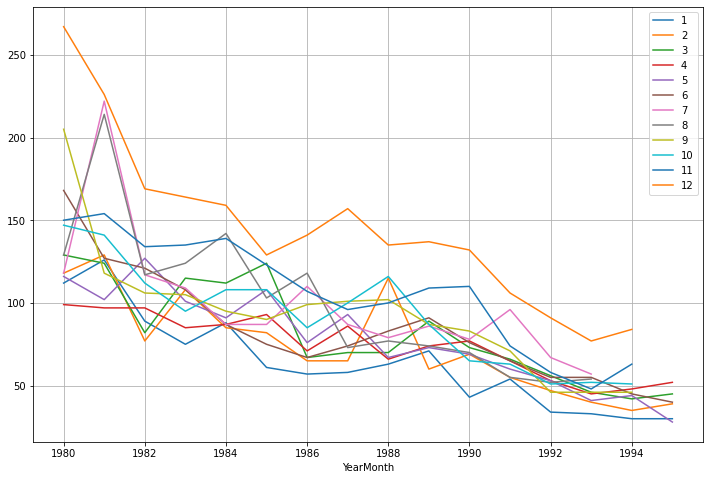

In [ ]:
years.plot()
plt.grid()
plt.legend(loc='best');

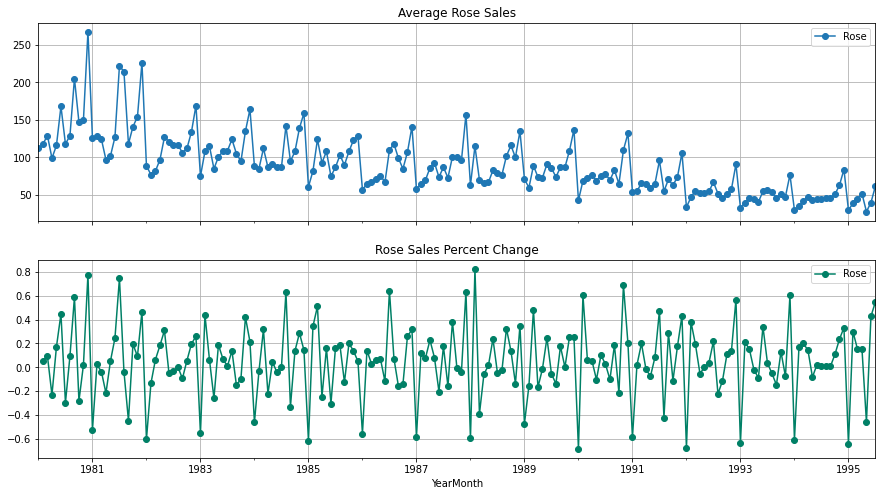

In [ ]:
average    = df_i.groupby(df.index)["Rose"].mean()
pct_change = df_i.groupby(df.index)["Rose"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Rose Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())

ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Rose Sales Percent Change",grid=True)

In [ ]:
train= df_i[df_i.index<='1991']
test= df_i[df_i.index>'1991']

In [ ]:

print(train.shape)
print(test.shape)

(133, 1)
(54, 1)


In [ ]:
print('Train', '\n', train.head(4), '\n'); print('Test', '\n', test.head(4), '\n');

Train 
              Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0 

Test 
             Rose
YearMonth       
1991-02-01  55.0
1991-03-01  66.0
1991-04-01  65.0
1991-05-01  60.0 



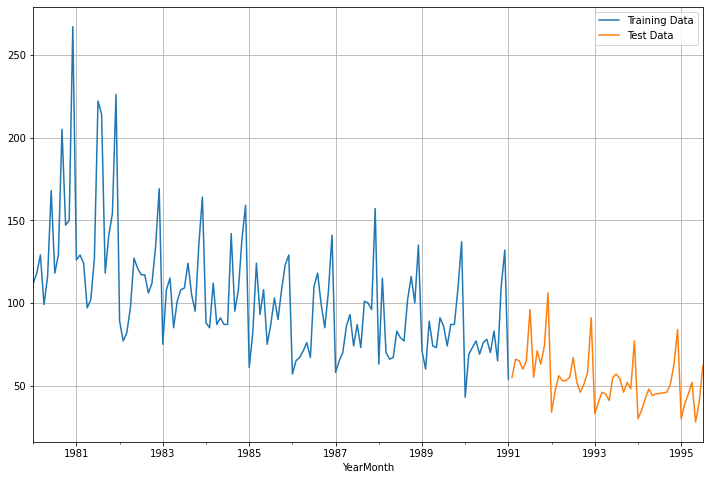

In [ ]:
train['Rose'].plot()
test['Rose'].plot()
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

In [ ]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time, '\n');
print('Test Time instance','\n',test_time, '\n');

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133] 

Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186] 



In [ ]:

LinearRegression_train= train.copy()
LinearRegression_test= test.copy()

In [ ]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time
print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
              Rose  time
YearMonth              
1980-01-01  112.0     1
1980-02-01  118.0     2
1980-03-01  129.0     3
1980-04-01   99.0     4
1980-05-01  116.0     5 

Last few rows of Training Data 
              Rose  time
YearMonth              
1990-09-01   83.0   129
1990-10-01   65.0   130
1990-11-01  110.0   131
1990-12-01  132.0   132
1991-01-01   54.0   133 

First few rows of Test Data 
             Rose  time
YearMonth             
1991-02-01  55.0   133
1991-03-01  66.0   134
1991-04-01  65.0   135
1991-05-01  60.0   136
1991-06-01  65.0   137 

Last few rows of Test Data 
             Rose  time
YearMonth             
1995-03-01  45.0   182
1995-04-01  52.0   183
1995-05-01  28.0   184
1995-06-01  40.0   185
1995-07-01  62.0   186 



In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr= LinearRegression()

In [ ]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values)

LinearRegression()

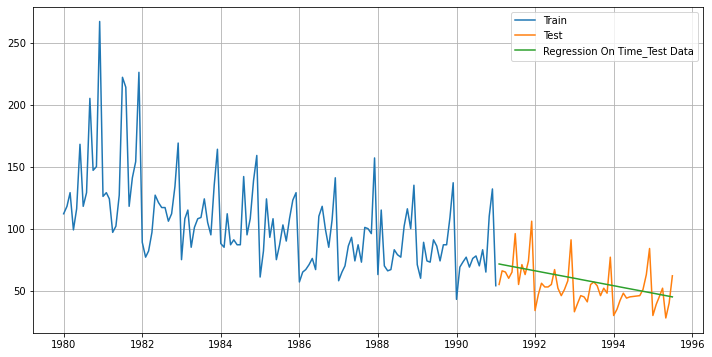

In [ ]:
test_predictions_model1= lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1
plt.figure(figsize=(12,6))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [ ]:
from sklearn import metrics

In [ ]:
rmse_model1_test = metrics.mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 15.159


In [ ]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,15.158725


In [ ]:
#Naive model

In [ ]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [ ]:
NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-02-01    54.0
1991-03-01    54.0
1991-04-01    54.0
1991-05-01    54.0
1991-06-01    54.0
Name: naive, dtype: float64

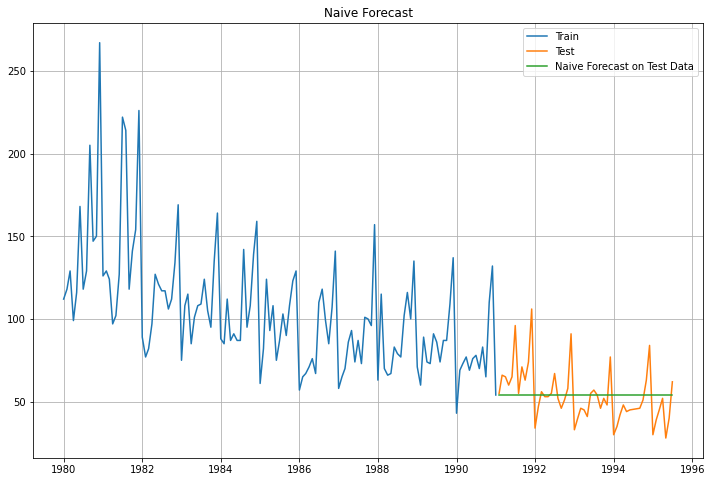

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [ ]:
rmse_model2_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['naive'],squared=False)
print("For Regression on Time forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For Regression on Time forecast on the Test Data,  RMSE is 15.906


In [ ]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf


,Test RMSE
RegressionOnTime,15.158725
NaiveModel,15.905715


In [ ]:
#simple average

In [ ]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [ ]:
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

,Rose,mean_forecast
YearMonth,,
1991-02-01,55.0,104.556391
1991-03-01,66.0,104.556391
1991-04-01,65.0,104.556391
1991-05-01,60.0,104.556391
1991-06-01,65.0,104.556391


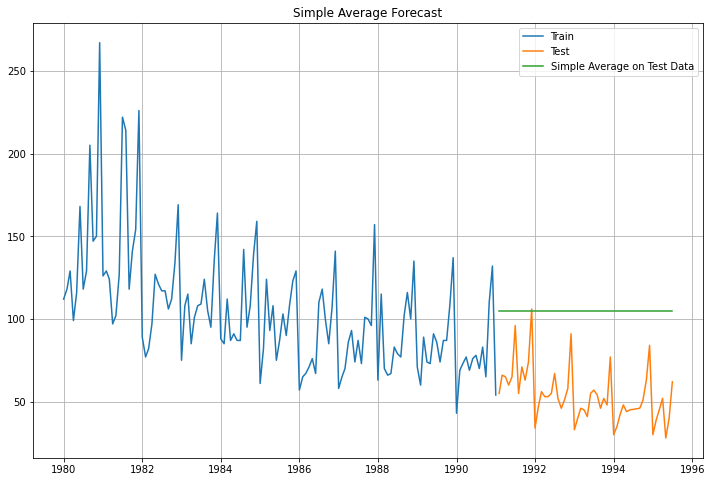

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [ ]:
rmse_model3_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 53.141


In [ ]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])
resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
RegressionOnTime,15.158725
NaiveModel,15.905715
SimpleAverageModel,53.140569


In [ ]:
#moving average

In [ ]:
MovingAverage = df_i.copy()
MovingAverage.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [ ]:
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()
MovingAverage.head()

,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1980-01-01,112.0,NaN,NaN,NaN,NaN
1980-02-01,118.0,115.0,NaN,NaN,NaN
1980-03-01,129.0,123.5,NaN,NaN,NaN
1980-04-01,99.0,114.0,114.5,NaN,NaN
1980-05-01,116.0,107.5,115.5,NaN,NaN


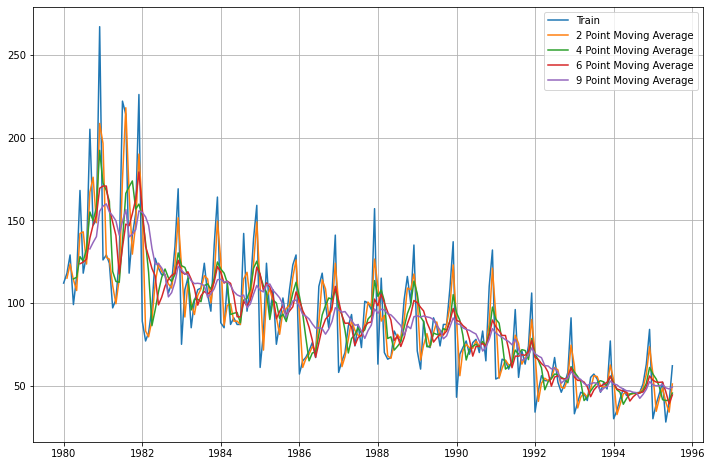

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [ ]:
trailing_MovingAverage_train=MovingAverage[MovingAverage.index<='1991'] 
trailing_MovingAverage_test=MovingAverage[MovingAverage.index>'1991']

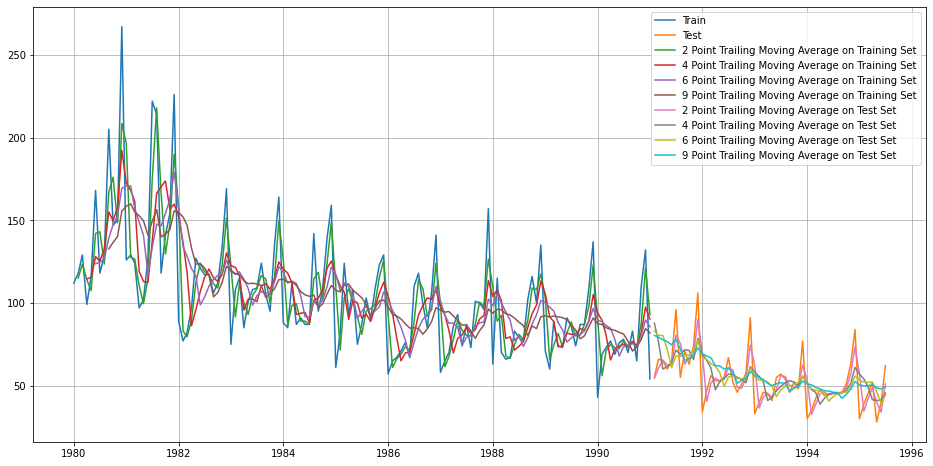

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

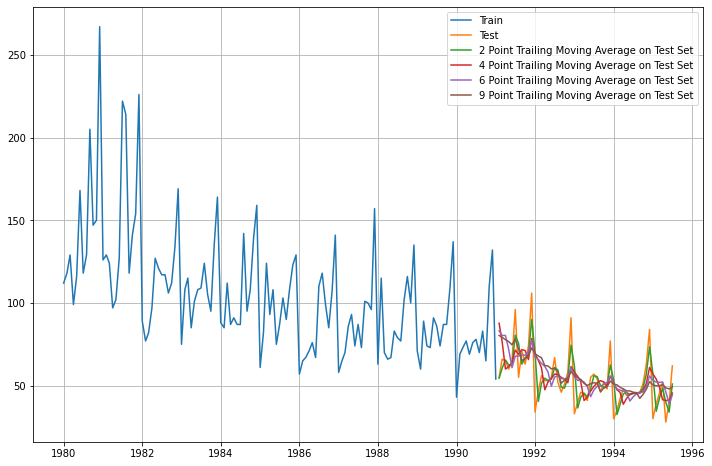

In [ ]:
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [ ]:
rmse_model4_test_2 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data, RMSE is %3.3f" %(rmse_model4_test_2))
rmse_model4_test_4 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

rmse_model4_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

rmse_model4_test_9 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))


For 2 point Moving Average Model forecast on the Training Data, RMSE is 10.355
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 13.725
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 14.055
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 14.371


In [ ]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
RegressionOnTime,15.158725
NaiveModel,15.905715
SimpleAverageModel,53.140569
2pointTrailingMovingAverage,10.354667
4pointTrailingMovingAverage,13.725015
6pointTrailingMovingAverage,14.054791
9pointTrailingMovingAverage,14.370674


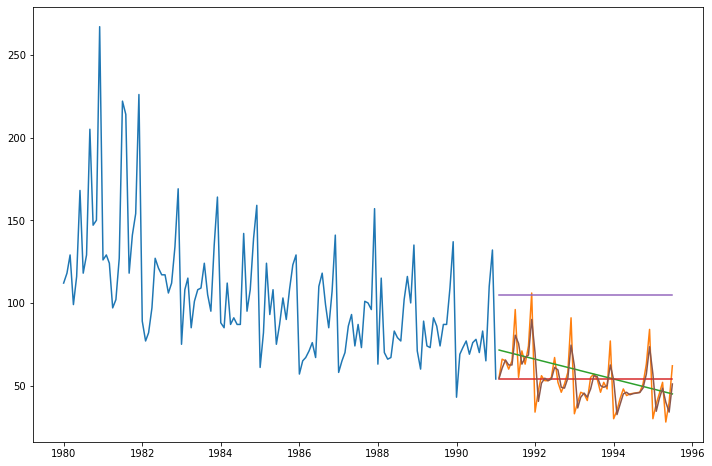

In [ ]:
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
SES_train = train.copy()
SES_test = test.copy()

In [ ]:
model_SES = SimpleExpSmoothing(SES_train['Rose'])

In [ ]:
model_SES_autofit = model_SES.fit(optimized=True,use_brute=True)

In [ ]:
model_SES_autofit.params

{'damping_slope': nan,
 'initial_level': 134.41649626754494,
 'initial_seasons': array([], dtype=float64),
 'initial_slope': nan,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 0.09764587950651961,
 'smoothing_seasonal': nan,
 'smoothing_slope': nan,
 'use_boxcox': False}

In [ ]:
test_predictions_model2 = model_SES_autofit.forecast(steps=len(test))
test_predictions_model2

1991-02-01    83.845231
1991-03-01    83.845231
1991-04-01    83.845231
1991-05-01    83.845231
1991-06-01    83.845231
1991-07-01    83.845231
1991-08-01    83.845231
1991-09-01    83.845231
1991-10-01    83.845231
1991-11-01    83.845231
1991-12-01    83.845231
1992-01-01    83.845231
1992-02-01    83.845231
1992-03-01    83.845231
1992-04-01    83.845231
1992-05-01    83.845231
1992-06-01    83.845231
1992-07-01    83.845231
1992-08-01    83.845231
1992-09-01    83.845231
1992-10-01    83.845231
1992-11-01    83.845231
1992-12-01    83.845231
1993-01-01    83.845231
1993-02-01    83.845231
1993-03-01    83.845231
1993-04-01    83.845231
1993-05-01    83.845231
1993-06-01    83.845231
1993-07-01    83.845231
1993-08-01    83.845231
1993-09-01    83.845231
1993-10-01    83.845231
1993-11-01    83.845231
1993-12-01    83.845231
1994-01-01    83.845231
1994-02-01    83.845231
1994-03-01    83.845231
1994-04-01    83.845231
1994-05-01    83.845231
1994-06-01    83.845231
1994-07-01    83

In [ ]:
rmse_model2_test = metrics.mean_squared_error(test['Rose'],test_predictions_model2,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 33.950


In [ ]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse_model2_test]}
                              ,index=['Alpha=0.098:SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,Test RMSE
RegressionOnTime,15.158725
NaiveModel,15.905715
SimpleAverageModel,53.140569
2pointTrailingMovingAverage,10.354667
4pointTrailingMovingAverage,13.725015
6pointTrailingMovingAverage,14.054791
9pointTrailingMovingAverage,14.370674
Alpha=0.098:SimpleExponentialSmoothing,33.949560


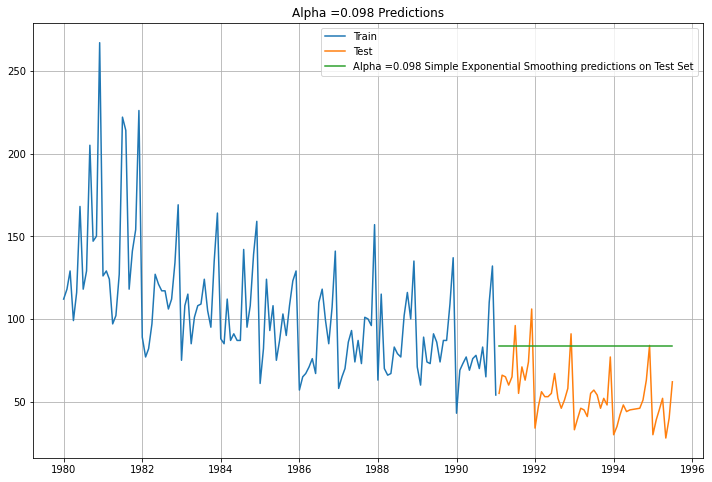

In [ ]:
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(test_predictions_model2, label='Alpha =0.098 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.098 Predictions');

In [ ]:
DES_train = train.copy()
DES_test = test.copy()

In [ ]:
model_DES = Holt(SES_train['Rose'])

In [ ]:
model_DES_autofit = model_DES.fit(optimized=True,use_brute=True)

In [ ]:
model_DES_autofit.params_formatted

,name,param,optimized
smoothing_level,alpha,0.157895,True
smoothing_slope,beta,0.157895,True
initial_level,l.0,112.000000,True
initial_slope,b.0,6.000000,True


In [ ]:
test_predictions_model3 = model_DES_autofit.forecast(steps=len(test))
test_predictions_model3

1991-02-01     82.019756
1991-03-01     82.364920
1991-04-01     82.710084
1991-05-01     83.055248
1991-06-01     83.400412
1991-07-01     83.745576
1991-08-01     84.090739
1991-09-01     84.435903
1991-10-01     84.781067
1991-11-01     85.126231
1991-12-01     85.471395
1992-01-01     85.816559
1992-02-01     86.161722
1992-03-01     86.506886
1992-04-01     86.852050
1992-05-01     87.197214
1992-06-01     87.542378
1992-07-01     87.887542
1992-08-01     88.232705
1992-09-01     88.577869
1992-10-01     88.923033
1992-11-01     89.268197
1992-12-01     89.613361
1993-01-01     89.958525
1993-02-01     90.303688
1993-03-01     90.648852
1993-04-01     90.994016
1993-05-01     91.339180
1993-06-01     91.684344
1993-07-01     92.029508
1993-08-01     92.374671
1993-09-01     92.719835
1993-10-01     93.064999
1993-11-01     93.410163
1993-12-01     93.755327
1994-01-01     94.100491
1994-02-01     94.445654
1994-03-01     94.790818
1994-04-01     95.135982
1994-05-01     95.481146


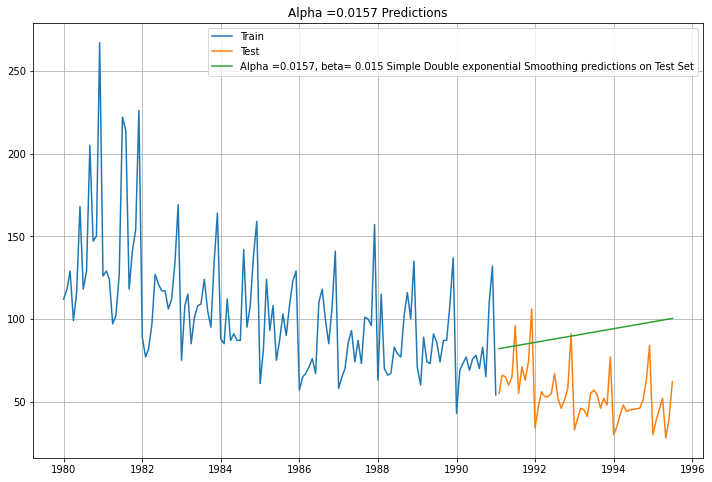

In [ ]:
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(test_predictions_model3, label='Alpha =0.0157, beta= 0.015 Simple Double exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.0157 Predictions');

In [ ]:
rmse_model3_test = metrics.mean_squared_error(test['Rose'],test_predictions_model3,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 41.781


In [ ]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse_model3_test]}
                              ,index=['Alpha=0.157,Beta=0.157:DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,Test RMSE
RegressionOnTime,15.158725
NaiveModel,15.905715
SimpleAverageModel,53.140569
2pointTrailingMovingAverage,10.354667
4pointTrailingMovingAverage,13.725015
6pointTrailingMovingAverage,14.054791
9pointTrailingMovingAverage,14.370674
Alpha=0.098:SimpleExponentialSmoothing,33.949560
"Alpha=0.157,Beta=0.157:DoubleExponentialSmoothing",41.781302


In [ ]:
TES_train = train.copy()
TES_test = test.copy()

In [ ]:
model_TES = ExponentialSmoothing(SES_train['Rose'],trend='additive',seasonal='multiplicative')

In [ ]:
model_TES_autofit = model_TES.fit(optimized=True,use_brute=True)

In [ ]:
model_TES_autofit.params

{'damping_slope': nan,
 'initial_level': 74.77072633244457,
 'initial_seasons': array([1.51004587, 1.7010693 , 1.851234  , 1.62905415, 1.82311301,
        1.97458509, 2.16980594, 2.30812938, 2.17025922, 2.13364447,
        2.47013408, 3.38772395]),
 'initial_slope': 0.0,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 0.10643057163186082,
 'smoothing_seasonal': 0.0,
 'smoothing_slope': 0.048229260158565386,
 'use_boxcox': False}

In [ ]:
test_predictions_model4 = model_TES_autofit.forecast(steps=len(test))
test_predictions_model4

1991-02-01     63.140734
1991-03-01     68.413327
1991-04-01     59.937452
1991-05-01     66.780737
1991-06-01     72.007836
1991-07-01     78.773917
1991-08-01     83.420082
1991-09-01     78.084024
1991-10-01     76.419441
1991-11-01     88.069309
1991-12-01    120.233445
1992-01-01     53.347184
1992-02-01     59.818874
1992-03-01     64.798225
1992-04-01     56.756224
1992-05-01     63.220549
1992-06-01     68.151853
1992-07-01     74.536705
1992-08-01     78.912751
1992-09-01     73.845927
1992-10-01     72.252845
1992-11-01     83.245614
1992-12-01    113.617874
1993-01-01     50.398356
1993-02-01     56.497014
1993-03-01     61.183122
1993-04-01     53.574995
1993-05-01     59.660361
1993-06-01     64.295869
1993-07-01     70.299493
1993-08-01     74.405420
1993-09-01     69.607830
1993-10-01     68.086250
1993-11-01     78.421920
1993-12-01    107.002303
1994-01-01     47.449528
1994-02-01     53.175154
1994-03-01     57.568020
1994-04-01     50.393767
1994-05-01     56.100174


In [ ]:
rmse_model4_test = metrics.mean_squared_error(test['Rose'],test_predictions_model4,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model4_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 16.698


In [ ]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse_model4_test]}
                              ,index=['Alpha=0.106,Beta=0.048,Gamma=0:TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf


,Test RMSE
RegressionOnTime,15.158725
NaiveModel,15.905715
SimpleAverageModel,53.140569
2pointTrailingMovingAverage,10.354667
4pointTrailingMovingAverage,13.725015
6pointTrailingMovingAverage,14.054791
9pointTrailingMovingAverage,14.370674
Alpha=0.098:SimpleExponentialSmoothing,33.949560
"Alpha=0.157,Beta=0.157:DoubleExponentialSmoothing",41.781302
"Alpha=0.106,Beta=0.048,Gamma=0:TripleExponentialSmoothing",16.698400


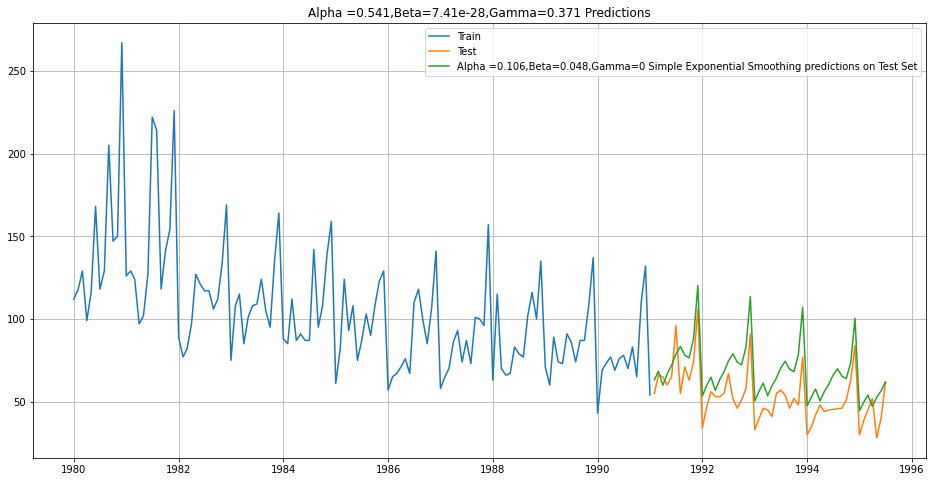

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(test_predictions_model4, label='Alpha =0.106,Beta=0.048,Gamma=0 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.541,Beta=7.41e-28,Gamma=0.371 Predictions');


In [ ]:
resultsDf_model = pd.DataFrame({'Alpha Values':[],'Test RMSE': []})
resultsDf_model

,Alpha Values,Test RMSE


In [ ]:
for i in np.arange(0.3,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(test))
    
    rmse_model2_test_i = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict',i],squared=False)
    
    resultsDf_model = resultsDf_model.append({'Alpha Values':i
                                              ,'Test RMSE':rmse_model2_test_i}, ignore_index=True)
    

In [ ]:
resultsDf_model

,Alpha Values,Test RMSE
0,0.3,35.213122
1,0.4,34.757035
2,0.5,32.931851
3,0.6,29.886084
4,0.7,25.924695
5,0.8,21.544964
6,0.9,17.664268


In [ ]:
resultsDf_model.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Test RMSE
6,0.9,17.664268
5,0.8,21.544964
4,0.7,25.924695
3,0.6,29.886084
2,0.5,32.931851
1,0.4,34.757035
0,0.3,35.213122


In [ ]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [resultsDf_model.sort_values(by=['Test RMSE'],ascending=True).values[0][1]]}
                              ,index=['Alpha=0.9,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,Test RMSE
RegressionOnTime,15.158725
NaiveModel,15.905715
SimpleAverageModel,53.140569
2pointTrailingMovingAverage,10.354667
4pointTrailingMovingAverage,13.725015
6pointTrailingMovingAverage,14.054791
9pointTrailingMovingAverage,14.370674
Alpha=0.098:SimpleExponentialSmoothing,33.949560
"Alpha=0.157,Beta=0.157:DoubleExponentialSmoothing",41.781302
"Alpha=0.106,Beta=0.048,Gamma=0:TripleExponentialSmoothing",16.698400


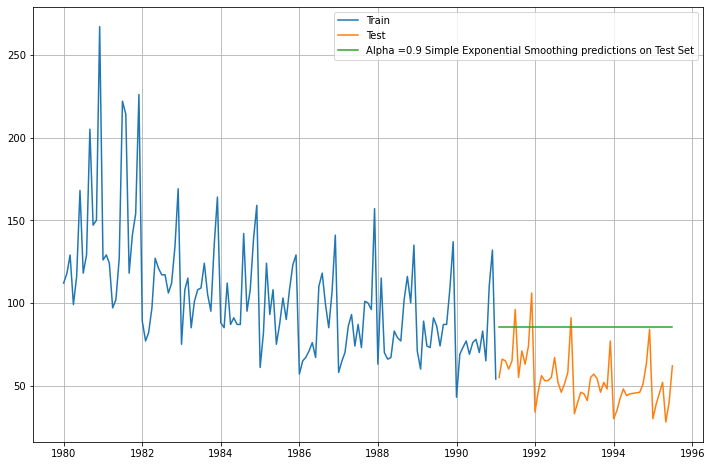

In [ ]:
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')



plt.plot(SES_test['predict', 0.3], label='Alpha =0.9 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')
plt.grid();

In [ ]:
DES_train = train.copy()
DES_test = test.copy()

In [ ]:
model_DES = Holt(DES_train['Rose'])

In [ ]:
resultsDf_model = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Test RMSE': []})
resultsDf_model

,Alpha Values,Beta Values,Test RMSE


In [ ]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(test))
        
        
        rmse_model4_test = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict',i,j],squared=False)
        
        resultsDf_model = resultsDf_model.append({'Alpha Values':i,'Beta Values':j
                                          ,'Test RMSE':rmse_model4_test}, ignore_index=True)

In [ ]:
resultsDf_model

,Alpha Values,Beta Values,Test RMSE
0,0.3,0.3,109.398361
1,0.3,0.4,138.145213
2,0.3,0.5,156.380584
3,0.3,0.6,156.186647
4,0.3,0.7,128.875211
...,...,...,...
59,1.0,0.6,1189.372256
60,1.0,0.7,1495.712267
61,1.0,0.8,1815.497023
62,1.0,0.9,2140.738663


In [ ]:
resultsDf_model.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Beta Values,Test RMSE
17,0.5,0.4,19.235704
6,0.3,0.9,24.665788
11,0.4,0.6,25.041661
16,0.5,0.3,38.299516
24,0.6,0.3,39.571337
...,...,...,...
61,1.0,0.8,1815.497023
54,0.9,0.9,1826.755354
62,1.0,0.9,2140.738663
55,0.9,1.0,2142.376133


In [ ]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [resultsDf_model.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                              ,index=['Alpha=0.5 & Beta=0.4,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,Test RMSE
RegressionOnTime,15.158725
NaiveModel,15.905715
SimpleAverageModel,53.140569
2pointTrailingMovingAverage,10.354667
4pointTrailingMovingAverage,13.725015
6pointTrailingMovingAverage,14.054791
9pointTrailingMovingAverage,14.370674
Alpha=0.098:SimpleExponentialSmoothing,33.949560
"Alpha=0.157,Beta=0.157:DoubleExponentialSmoothing",41.781302
"Alpha=0.106,Beta=0.048,Gamma=0:TripleExponentialSmoothing",16.698400


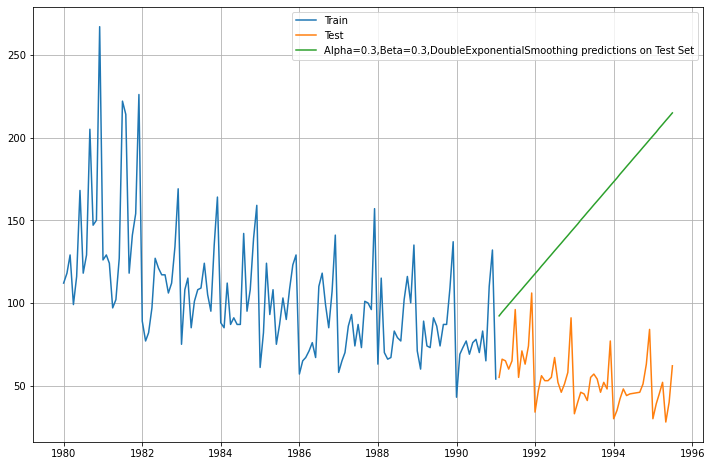

In [ ]:
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')
plt.plot(DES_test['predict',0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid()

In [ ]:
TES_train = train.copy()
TES_test = test.copy()

In [ ]:
resultsDf_model = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Test RMSE': []})
resultsDf_model

,Alpha Values,Beta Values,Gamma Values,Test RMSE


In [ ]:
for i in np.arange(0.3,1,0.1):
    for j in np.arange(0.3,1,0.1):
        for k in np.arange(0.3,1.,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
                
            rmse_model6_test_2 = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict',i,j,k],squared=False)
                    
            resultsDf_model = resultsDf_model.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k
                                                  ,'Test RMSE':rmse_model6_test_2}, ignore_index=True)

In [ ]:
resultsDf_model

,Alpha Values,Beta Values,Gamma Values,Test RMSE
0,0.3,0.3,0.3,42.352578
1,0.3,0.3,0.4,30.826261
2,0.3,0.3,0.5,16.933657
3,0.3,0.3,0.6,15.963324
4,0.3,0.3,0.7,56.416858
...,...,...,...,...
338,0.9,0.9,0.5,20535.739678
339,0.9,0.9,0.6,3693.742796
340,0.9,0.9,0.7,1633.421505
341,0.9,0.9,0.8,6727.725597


In [ ]:
resultsDf_model.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Beta Values,Gamma Values,Test RMSE
15,0.3,0.5,0.4,1.408138e+01
16,0.3,0.5,0.5,1.512780e+01
3,0.3,0.3,0.6,1.596332e+01
2,0.3,0.3,0.5,1.693366e+01
9,0.3,0.4,0.5,2.188762e+01
...,...,...,...,...
117,0.5,0.5,0.8,3.210672e+05
314,0.9,0.5,0.9,4.459317e+05
221,0.7,0.6,0.7,9.596067e+05
244,0.7,0.9,0.9,3.480351e+06


In [ ]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [resultsDf_model.sort_values(by=['Test RMSE'],ascending=True).values[0][3]]}
                              ,index=['Alpha=0.3,Beta=0.4,Gamma=0.3:TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,Test RMSE
RegressionOnTime,15.158725
NaiveModel,15.905715
SimpleAverageModel,53.140569
2pointTrailingMovingAverage,10.354667
4pointTrailingMovingAverage,13.725015
6pointTrailingMovingAverage,14.054791
9pointTrailingMovingAverage,14.370674
Alpha=0.098:SimpleExponentialSmoothing,33.949560
"Alpha=0.157,Beta=0.157:DoubleExponentialSmoothing",41.781302
"Alpha=0.106,Beta=0.048,Gamma=0:TripleExponentialSmoothing",16.698400


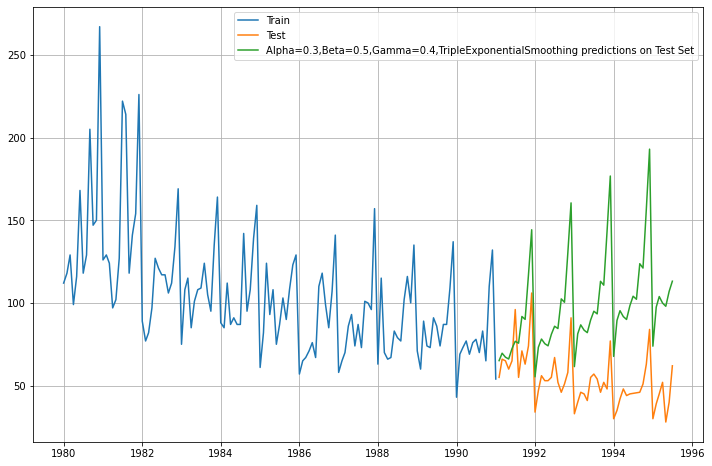

In [ ]:
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')


plt.plot(TES_test['predict', 0.3,0.4, 0.3], label='Alpha=0.3,Beta=0.5,Gamma=0.4,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [ ]:
fullmodel1 = ExponentialSmoothing(df_i,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.3,
                                                                 smoothing_slope=0.4,
                                                                 smoothing_seasonal=0.3)

In [ ]:
RMSE_fullmodel1 = metrics.mean_squared_error(df_i['Rose'],fullmodel1.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel1)

RMSE: 24.266535961104537


In [ ]:
prediction_1 = fullmodel1.forecast(steps=12)

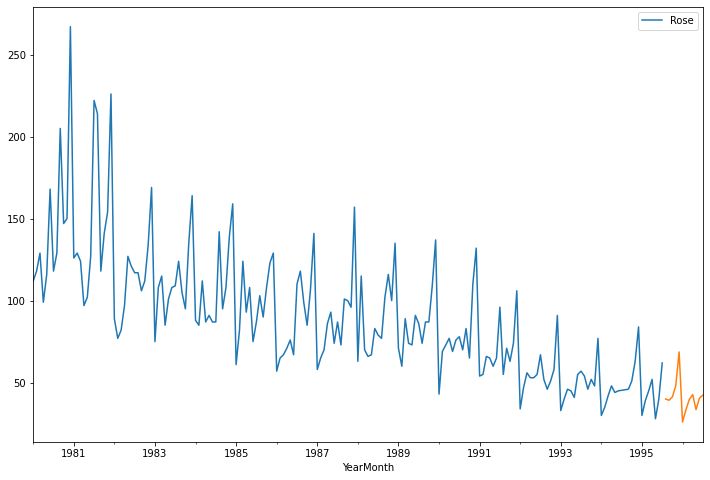

In [ ]:
df_i.plot()
prediction_1.plot();

In [ ]:
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(fullmodel1.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(fullmodel1.resid,ddof=1)})
pred_1_df.head()

,lower_CI,prediction,upper_ci
1995-08-01,-7.559277,40.074648,87.708574
1995-09-01,-8.388196,39.245730,86.879656
1995-10-01,-6.321556,41.312369,88.946295
1995-11-01,0.433543,48.067469,95.701394
1995-12-01,21.101528,68.735454,116.369379


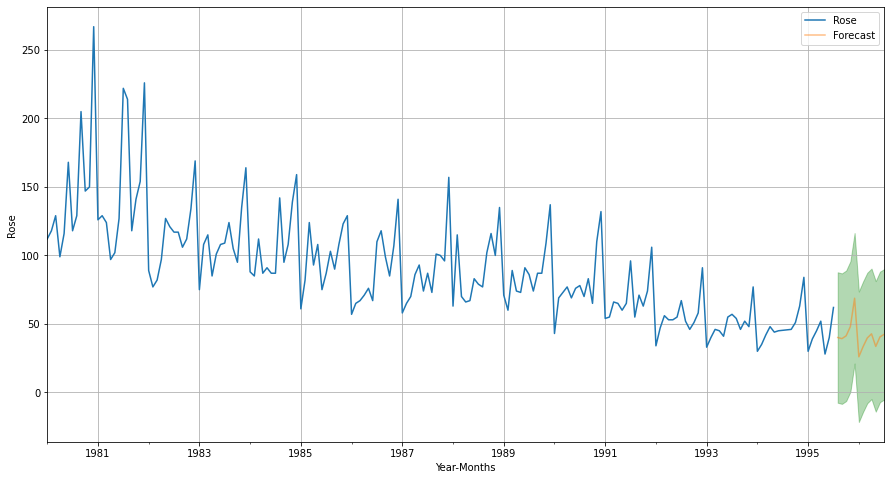

In [ ]:
axis = df_i.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='Green', alpha=.3)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Rose')
plt.legend(loc='best')
plt.grid()
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

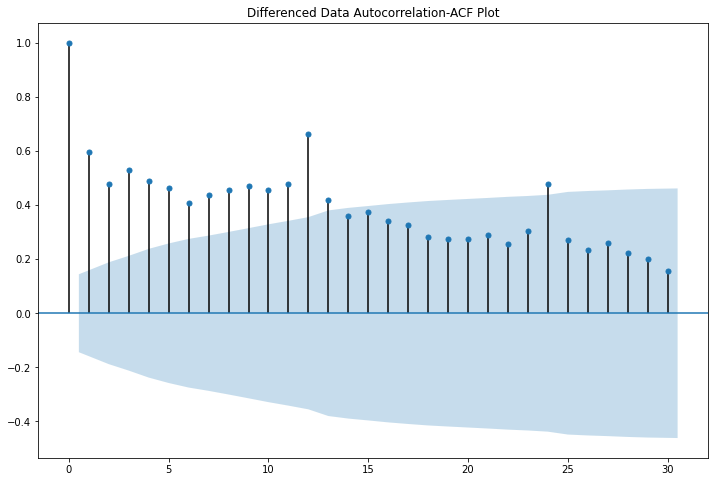

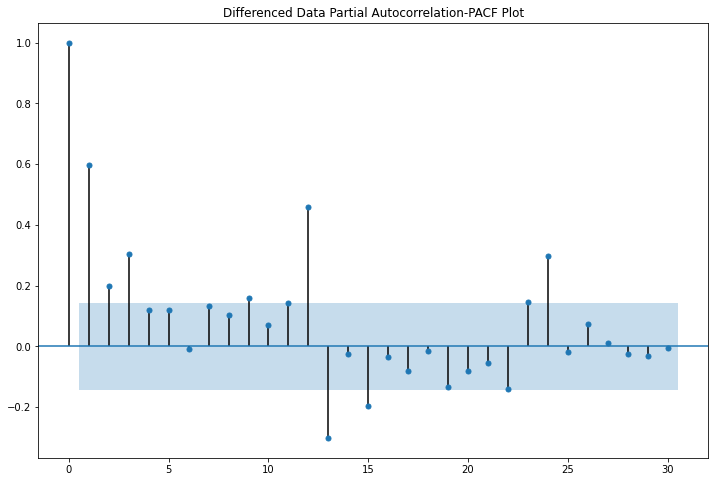

In [ ]:
plot_acf(df['Rose'].dropna(),lags=30,title='Differenced Data Autocorrelation-ACF Plot')
plot_pacf(df['Rose'].dropna(),lags=30,title='Differenced Data Partial Autocorrelation-PACF Plot')
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

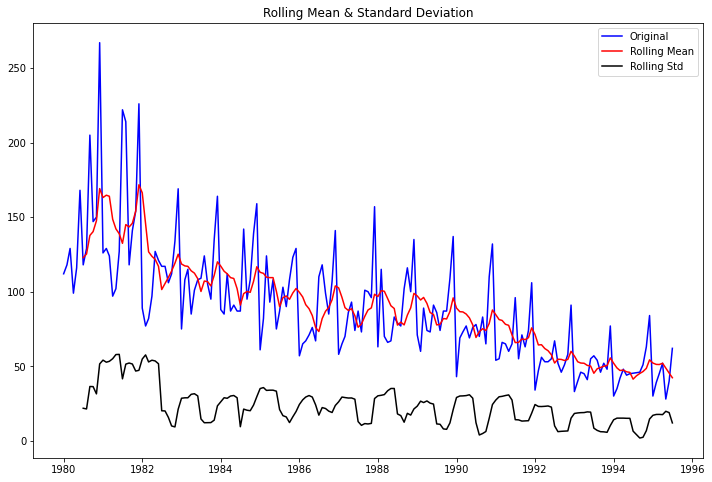

Results of Dickey-Fuller Test:
Test Statistic                  -1.876699
p-value                          0.343101
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [ ]:
test_stationarity(df_imputed['Rose'])

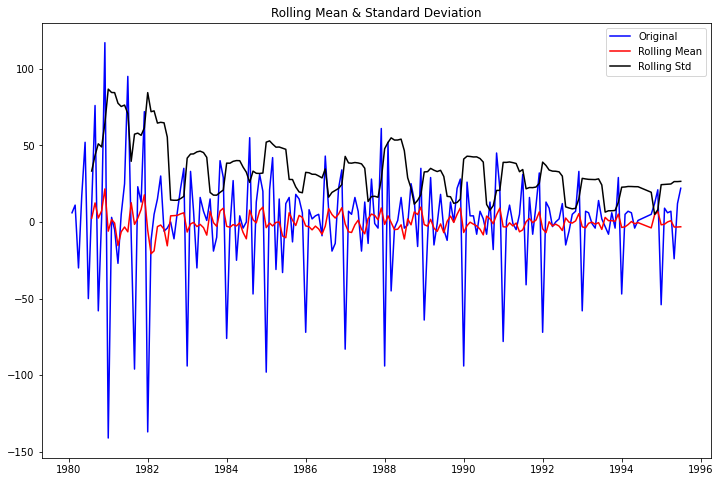

Results of Dickey-Fuller Test:
Test Statistic                -7.966534e+00
p-value                        2.855044e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.700000e+02
Critical Value (1%)           -3.469413e+00
Critical Value (5%)           -2.878696e+00
Critical Value (10%)          -2.575917e+00
dtype: float64 



In [ ]:
test_stationarity(df['Rose'].diff().dropna())

In [ ]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [ ]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [ ]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1348.279904268987
ARIMA(0, 1, 1) - AIC:1289.9261249019148
ARIMA(0, 1, 2) - AIC:1286.4638170039843
ARIMA(1, 1, 0) - AIC:1332.0486539146434
ARIMA(1, 1, 1) - AIC:1287.3927514814443
ARIMA(1, 1, 2) - AIC:1286.659935407906
ARIMA(2, 1, 0) - AIC:1311.61252330365
ARIMA(2, 1, 1) - AIC:1288.514824993996
ARIMA(2, 1, 2) - AIC:1288.6465846460487


In [ ]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
2,"(0, 1, 2)",1286.463817
5,"(1, 1, 2)",1286.659935
4,"(1, 1, 1)",1287.392751
7,"(2, 1, 1)",1288.514825
8,"(2, 1, 2)",1288.646585
1,"(0, 1, 1)",1289.926125
6,"(2, 1, 0)",1311.612523
3,"(1, 1, 0)",1332.048654
0,"(0, 1, 0)",1348.279904


In [ ]:
auto_ARIMA = ARIMA(train['Rose'], order=(0,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  132
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -639.232
Method:                       css-mle   S.D. of innovations             30.161
Date:                Thu, 14 Jul 2022   AIC                           1286.464
Time:                        16:22:42   BIC                           1297.995
Sample:                    02-01-1980   HQIC                          1291.150
                         - 01-01-1991                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.5011      0.083     -6.016      0.000      -0.664      -0.338
ma.L1.D.Rose    -0.7722      0.101     -7.649      0.000      -0.970      -0.574
ma.L2.D.Rose    -0.2278      0.096     -2.36

In [ ]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [ ]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Rose'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

14.926400488390996


In [ ]:
resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(0,1,2) Best AIC'])

resultsDf

,RMSE
"ARIMA(0,1,2) Best AIC",14.9264


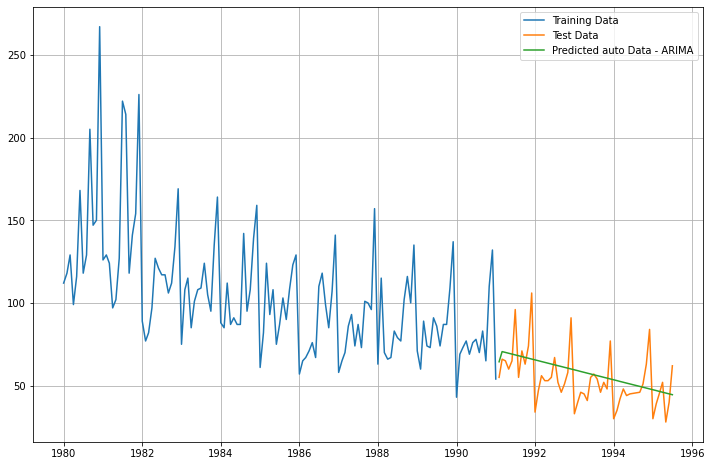

In [ ]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,predicted_auto_ARIMA[0],label='Predicted auto Data - ARIMA')
plt.legend(loc='best')
plt.grid();

In [ ]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [ ]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [ ]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1337.085435720141
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1155.3473105762916
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:987.6216499471079
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1149.4077143332859
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1125.9282221474878
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:978.7245365614622
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:969.7738313949183
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:971.7616707438683
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:964.3337784824942
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1273.3863931141382
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1106.9859686553357
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:931.3795823441721
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1103.9900395636146
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1062.8743964685532
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:926.8389414076909
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:922.3963322385107
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:922.977924813311
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:908.846801465329
SARIMA(0, 1, 2)x(0, 0, 

In [ ]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
26,"(0, 1, 2)","(2, 0, 2, 12)",895.600552
80,"(2, 1, 2)","(2, 0, 2, 12)",898.277952
69,"(2, 1, 1)","(2, 0, 0, 12)",904.301829
53,"(1, 1, 2)","(2, 0, 2, 12)",904.305470
78,"(2, 1, 2)","(2, 0, 0, 12)",905.189218


In [ ]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  133
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -440.800
Date:                            Thu, 14 Jul 2022   AIC                            895.601
Time:                                    16:27:21   BIC                            914.178
Sample:                                         0   HQIC                           903.129
                                            - 133                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8451    352.865     -0.002      0.998    -692.448     690.758
ma.L2         -0.1549     54.616   

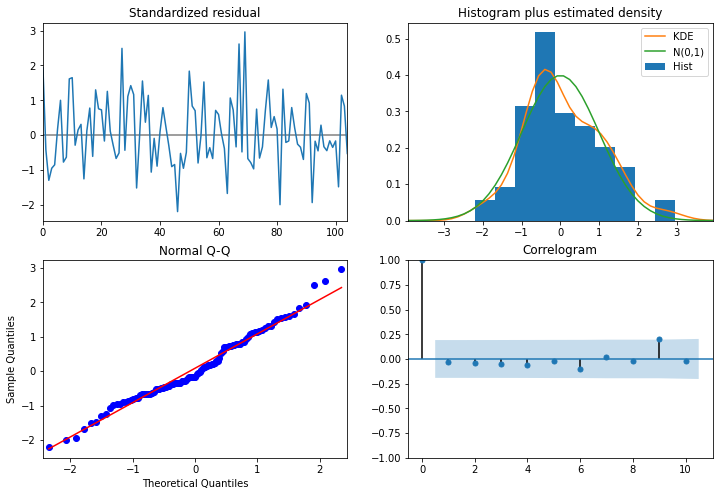

In [ ]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

In [ ]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,69.154990,15.872058,38.046328,100.263652
1,76.986211,16.084022,45.462107,108.510315
2,75.974603,16.084022,44.450499,107.498706
3,72.447670,16.084022,40.923566,103.971773
4,78.902551,16.084022,47.378447,110.426654


In [ ]:
rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

26.476827713654426


In [ ]:
temp_resultsDf_auto_SARIMA= pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(0,1,2)(2,0,2,12) Best AIC'])


resultsDf = pd.concat([resultsDf,temp_resultsDf_auto_SARIMA])

resultsDf

,RMSE
"ARIMA(0,1,2) Best AIC",14.926400
"SARIMA(0,1,2)(2,0,2,12) Best AIC",26.476828


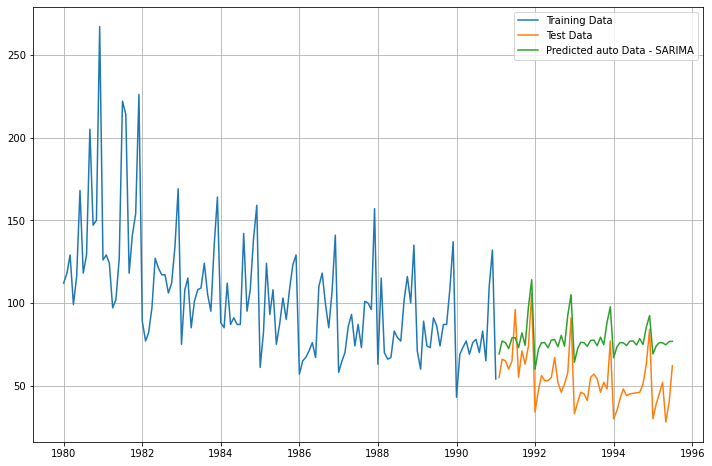

In [ ]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,predicted_auto_SARIMA_12.predicted_mean,label='Predicted auto Data - SARIMA')
plt.legend(loc='best')
plt.grid();

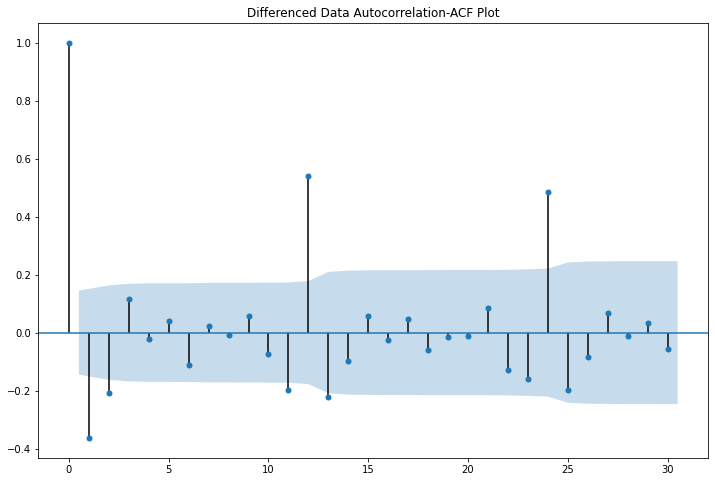

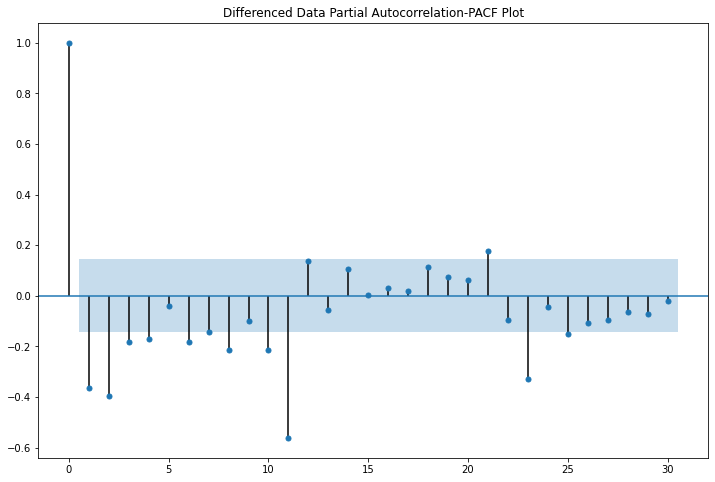

In [ ]:
plot_acf(df['Rose'].diff(1).dropna(),lags=30,title='Differenced Data Autocorrelation-ACF Plot')
plot_pacf(df['Rose'].diff(1).dropna(),lags=30,title='Differenced Data Partial Autocorrelation-PACF Plot')
plt.show()

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
manual_ARIMA = ARIMA(train['Rose'].astype('float64'), order=(4,1,3))
results_manual_ARIMA = manual_ARIMA.fit()
print(results_manual_ARIMA.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  132
Model:                 ARIMA(4, 1, 3)   Log Likelihood                -636.321
Method:                       css-mle   S.D. of innovations             29.091
Date:                Thu, 14 Jul 2022   AIC                           1290.641
Time:                        16:29:13   BIC                           1316.586
Sample:                    02-01-1980   HQIC                          1301.184
                         - 01-01-1991                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.5040      0.079     -6.368      0.000      -0.659      -0.349
ar.L1.D.Rose     0.4828      0.089      5.414      0.000       0.308       0.658
ar.L2.D.Rose    -1.0893      0.094    -11.61

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))
rmse = mean_squared_error(test['Rose'],predicted_manual_ARIMA[0],squared=False)
print(rmse)

14.70000425548004


In [ ]:
temp_resultsDfARIMA1 = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(4,1,3) Looking at ACF & PACF plot'])


resultsDf = pd.concat([resultsDf,temp_resultsDfARIMA1])

resultsDf

,RMSE
"ARIMA(0,1,2) Best AIC",14.926400
"SARIMA(0,1,2)(2,0,2,12) Best AIC",26.476828
"ARIMA(4,1,3) Looking at ACF & PACF plot",14.700004


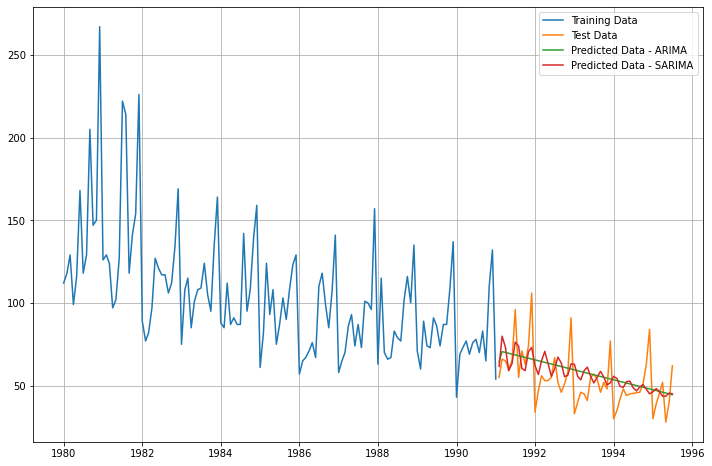

In [ ]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,predicted_auto_ARIMA[0],label='Predicted Data - ARIMA')
plt.plot(test.index,predicted_manual_ARIMA[0],label='Predicted Data - SARIMA')

plt.legend(loc='best')
plt.grid();

In [ ]:
SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(4, 1, 3),
                                seasonal_order=(3,0,2,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMA_12 = SARIMA_12.fit(maxiter=1000)
print(results_SARIMA_12.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  133
Model:             SARIMAX(4, 1, 3)x(3, 0, 2, 12)   Log Likelihood                -374.496
Date:                            Thu, 14 Jul 2022   AIC                            774.992
Time:                                    16:31:26   BIC                            807.775
Sample:                                         0   HQIC                           788.223
                                            - 133                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6246      0.321     -1.947      0.052      -1.253       0.004
ar.L2          0.1305      0.295   

In [ ]:
temp_results_Sarima_12 = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA (4,1,3)(3,0,2)12 Looking at ACF & PACF Plots '] )


resultsDf = pd.concat([resultsDf,temp_results_Sarima_12])

resultsDf

,RMSE
"ARIMA(0,1,2) Best AIC",14.926400
"SARIMA(0,1,2)(2,0,2,12) Best AIC",26.476828
"ARIMA(4,1,3) Looking at ACF & PACF plot",14.700004
"SARIMA (4,1,3)(3,0,2)12 Looking at ACF & PACF Plots",14.700004


In [ ]:
full_data_model = sm.tsa.statespace.SARIMAX(df['Rose'],
                                order=(4,1,3),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                           Statespace Model Results                           
Dep. Variable:                   Rose   No. Observations:                  187
Model:               SARIMAX(4, 1, 3)   Log Likelihood                -847.914
Date:                Thu, 14 Jul 2022   AIC                           1711.828
Time:                        16:32:10   BIC                           1737.460
Sample:                    01-01-1980   HQIC                          1722.219
                         - 07-01-1995                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5749      0.112    -14.105      0.000      -1.794      -1.356
ar.L2         -0.6281      0.166     -3.781      0.000      -0.954      -0.303
ar.L3         -0.0311      0.174     -0.179      0.8

In [ ]:
predicted_manual_ARIMA_12_full_data = results_full_data_model.get_forecast(steps=12)

In [ ]:
predicted_manual_ARIMA_12_full_data.summary_frame(alpha=0.05).head()

Rose,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-01,49.043962,27.215675,-4.297782,102.385705
1995-09-01,45.963577,29.109351,-11.089702,103.016856
1995-10-01,50.480414,29.148667,-6.649924,107.610751
1995-11-01,46.113312,29.885539,-12.461267,104.687892
1995-12-01,50.008934,29.942210,-8.676720,108.694588


In [ ]:
rmse = mean_squared_error(df_imputed['Rose'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 29.417827726790442


In [ ]:
temp_resultsDfSARIMA_Fulldata = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA_Fulldata(0,1,2)'])


resultsDf = pd.concat([resultsDf,temp_resultsDfSARIMA_Fulldata])

resultsDf

,RMSE
"ARIMA(0,1,2) Best AIC",14.926400
"SARIMA(0,1,2)(2,0,2,12) Best AIC",26.476828
"ARIMA(4,1,3) Looking at ACF & PACF plot",14.700004
"SARIMA (4,1,3)(3,0,2)12 Looking at ACF & PACF Plots",14.700004
"ARIMA_Fulldata(0,1,2)",29.417828


In [ ]:
pred_dynamic = results_full_data_model.get_prediction(start=pd.to_datetime('1980-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

pred95 = results_full_data_model.get_forecast(steps=12, alpha=0.05)
pred_ci_95 = pred95.conf_int()
forecast_fullmodel_autosarima = pred95.predicted_mean

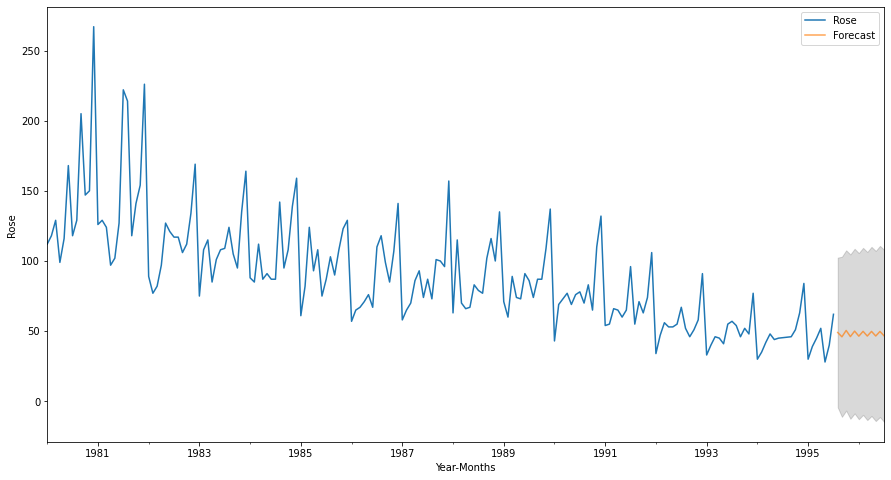

In [ ]:

axis = df_imputed.plot(label='Observed', figsize=(15, 8))
forecast_fullmodel_autosarima.plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(forecast_fullmodel_autosarima.index, pred_ci_95['lower Rose'], pred_ci_95['upper Rose'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Rose')
plt.legend(loc='best')
plt.show()

In [ ]:
resultsDf

,RMSE
"ARIMA(0,1,2) Best AIC",14.926400
"SARIMA(0,1,2)(2,0,2,12) Best AIC",26.476828
"ARIMA(4,1,3) Looking at ACF & PACF plot",14.700004
"SARIMA (4,1,3)(3,0,2)12 Looking at ACF & PACF Plots",14.700004
"ARIMA_Fulldata(0,1,2)",29.417828


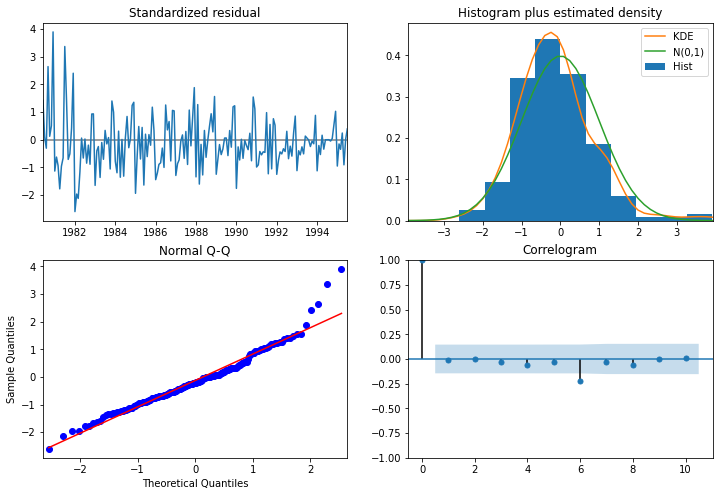

In [ ]:
results_full_data_model.plot_diagnostics();